###  **CUREYA WEEK 3 TASK - HOUSE PRICE PREDICTION**

**Executed by: Kriti Yadav | ykriti288@gmail.com**

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn import metrics  
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from keras import Model
from warnings import filterwarnings
filterwarnings(action='ignore')


### Read csv file

In [2]:
url = "https://raw.githubusercontent.com/kriti818/Cureya/main/HousingData.csv"
dataset = pd.read_csv(url)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Check for null values

In [3]:
print(dataset.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


### Replace Null values

In [4]:
dataset["CRIM"].fillna(dataset["CRIM"].mean(),inplace=True)
dataset["ZN"].fillna(dataset["ZN"].mean(),inplace=True)
dataset["INDUS"].fillna(dataset["INDUS"].mean(),inplace=True)
dataset["CHAS"].fillna(dataset["CHAS"].mean(),inplace=True)
dataset["AGE"].fillna(dataset["AGE"].mean(),inplace=True)
dataset["LSTAT"].fillna(dataset["LSTAT"].mean(),inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Data Summarization

In [6]:
print(dataset.shape)

(506, 14)


In [7]:
print(dataset.head(10))

      CRIM    ZN  INDUS      CHAS    NOX  ...  TAX  PTRATIO       B      LSTAT  MEDV
0  0.00632  18.0   2.31  0.000000  0.538  ...  296     15.3  396.90   4.980000  24.0
1  0.02731   0.0   7.07  0.000000  0.469  ...  242     17.8  396.90   9.140000  21.6
2  0.02729   0.0   7.07  0.000000  0.469  ...  242     17.8  392.83   4.030000  34.7
3  0.03237   0.0   2.18  0.000000  0.458  ...  222     18.7  394.63   2.940000  33.4
4  0.06905   0.0   2.18  0.000000  0.458  ...  222     18.7  396.90  12.715432  36.2
5  0.02985   0.0   2.18  0.000000  0.458  ...  222     18.7  394.12   5.210000  28.7
6  0.08829  12.5   7.87  0.069959  0.524  ...  311     15.2  395.60  12.430000  22.9
7  0.14455  12.5   7.87  0.000000  0.524  ...  311     15.2  396.90  19.150000  27.1
8  0.21124  12.5   7.87  0.000000  0.524  ...  311     15.2  386.63  29.930000  16.5
9  0.17004  12.5   7.87  0.069959  0.524  ...  311     15.2  386.71  17.100000  18.9

[10 rows x 14 columns]


In [8]:
print(dataset.tail(10))

        CRIM   ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B      LSTAT  MEDV
496  0.28960  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  21.140000  19.7
497  0.26838  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.100000  18.3
498  0.23912  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  12.920000  21.2
499  0.17783  0.0   9.69   0.0  0.585  ...  391     19.2  395.77  15.100000  17.5
500  0.22438  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.330000  16.8
501  0.06263  0.0  11.93   0.0  0.573  ...  273     21.0  391.99  12.715432  22.4
502  0.04527  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.080000  20.6
503  0.06076  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.640000  23.9
504  0.10959  0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.480000  22.0
505  0.04741  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.880000  11.9

[10 rows x 14 columns]


In [9]:
print(dataset.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.611874   11.211934   11.083992  ...  356.674032   12.715432   22.532806
std      8.545770   22.921051    6.699165  ...   91.294864    7.012739    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.083235    0.000000    5.190000  ...  375.377500    7.230000   17.025000
50%      0.290250    0.000000    9.900000  ...  391.440000   11.995000   21.200000
75%      3.611874   11.211934   18.100000  ...  396.225000   16.570000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


### Data Visualization

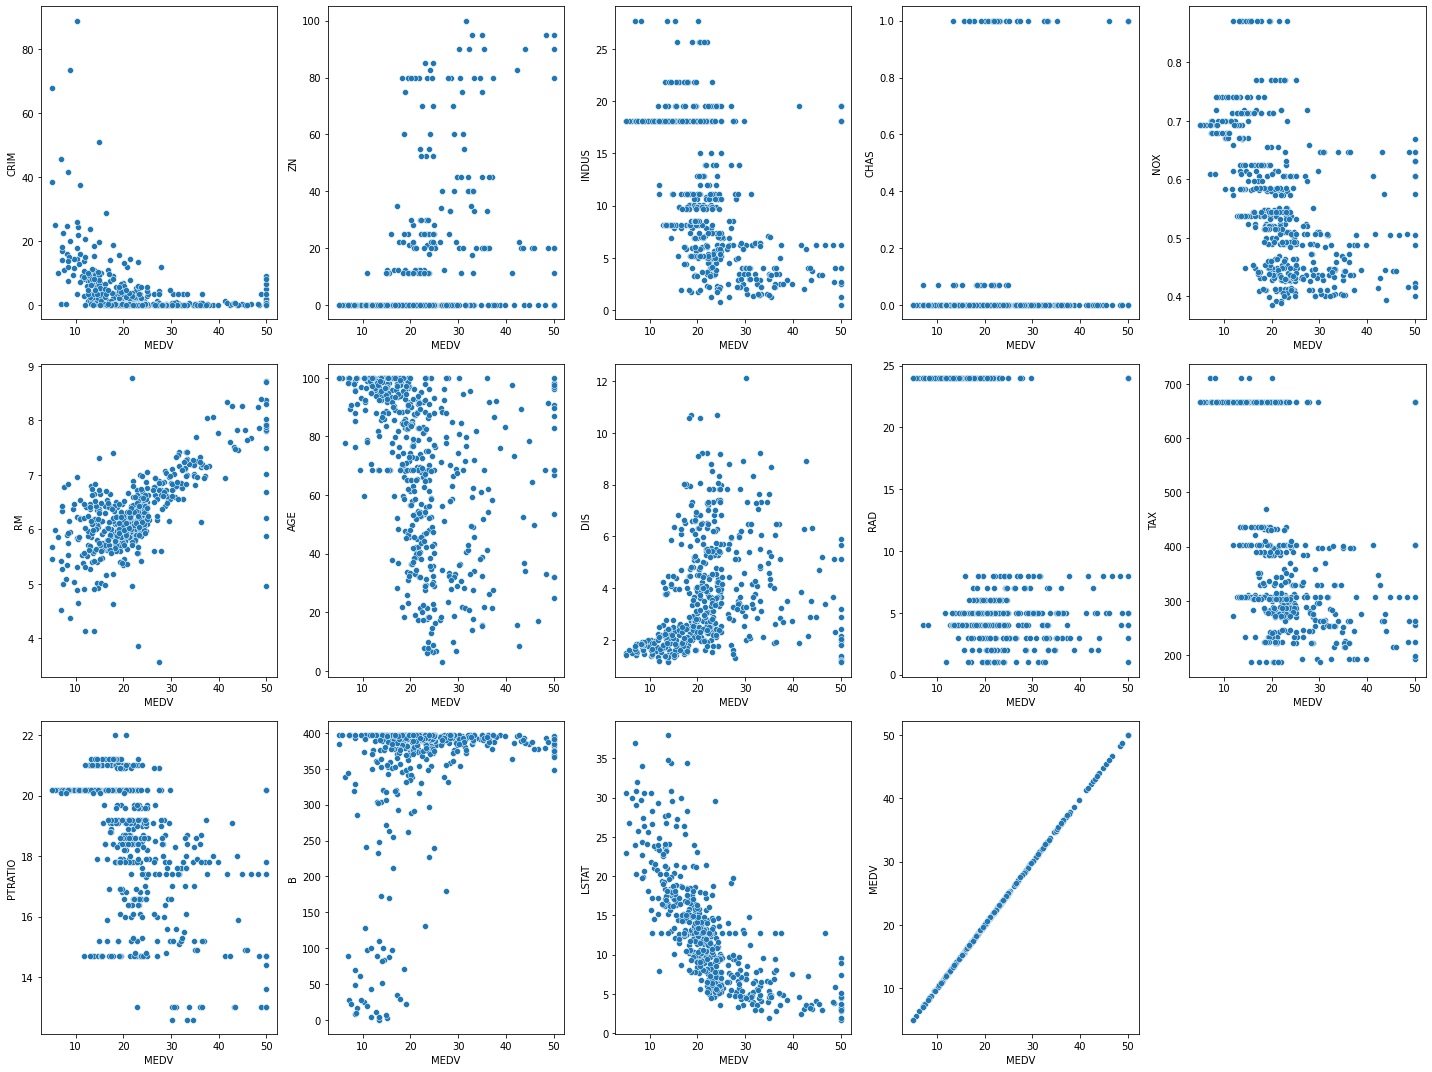

In [10]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in dataset:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = dataset['MEDV'], y = dataset[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

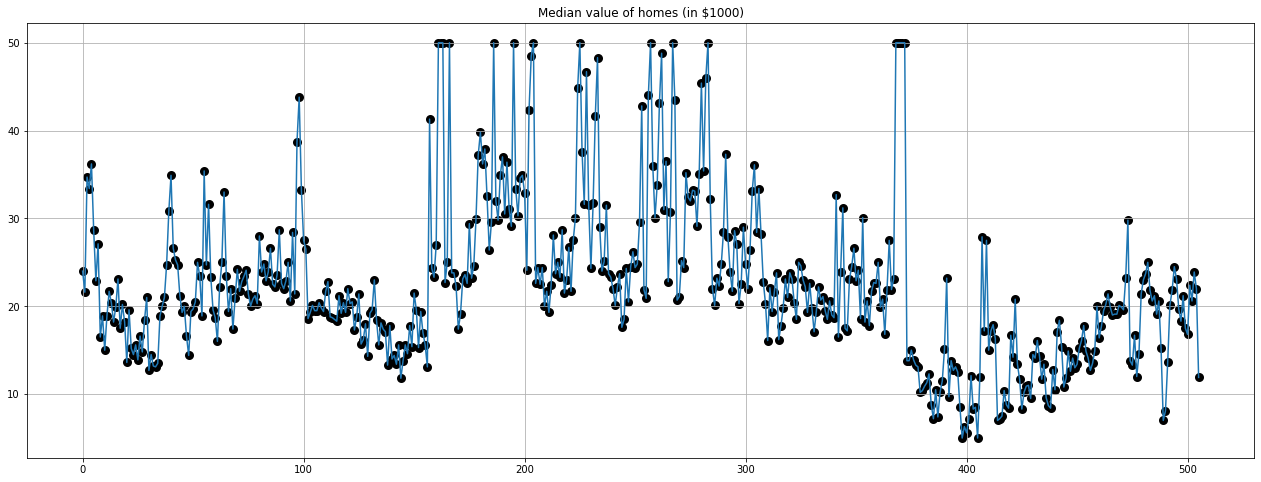

In [11]:
plt.figure(figsize=(22,8))
plt.scatter(dataset.index,dataset["MEDV"],color="black",lw=3)
plt.plot(dataset.index,dataset["MEDV"])
plt.title("Median value of homes (in $1000)")
plt.grid(True)
plt.show()

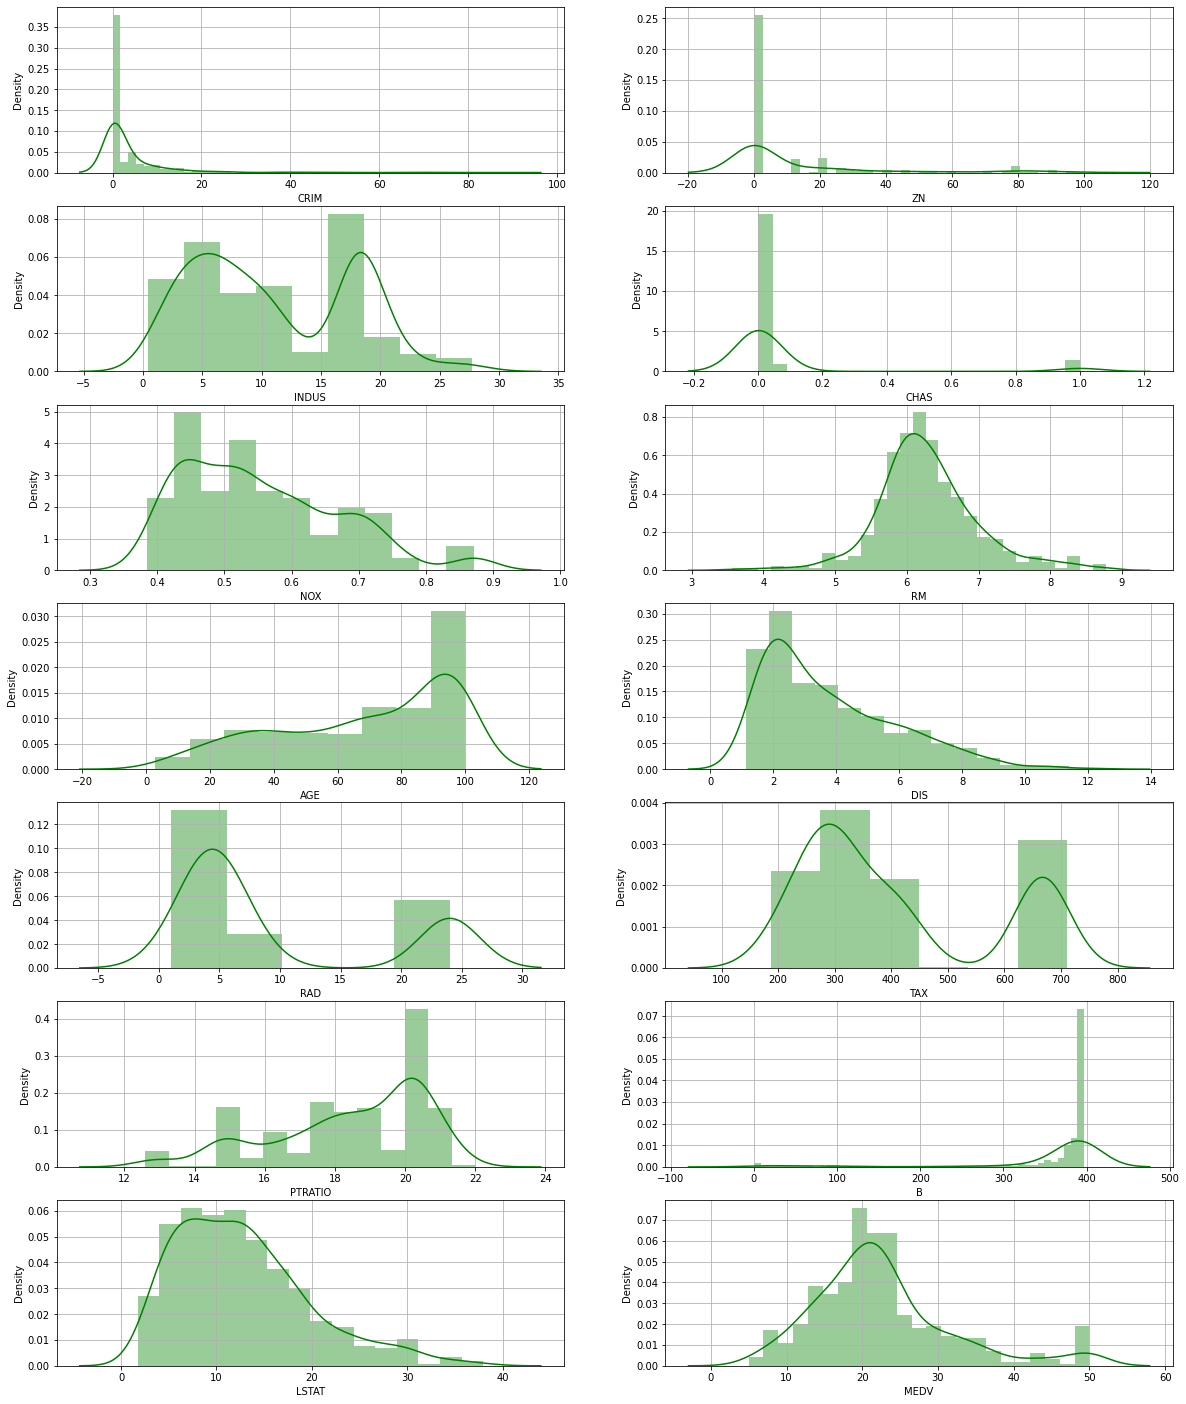

In [12]:
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(dataset.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

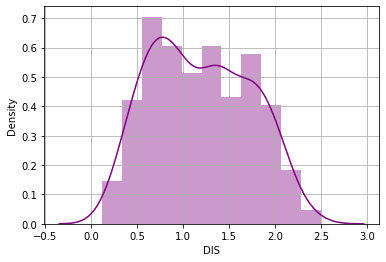

In [13]:
def log_transform(col):
    return np.log(col[0])

dataset["DIS"]=dataset[["DIS"]].apply(log_transform, axis=1)

sns.distplot(dataset["DIS"], color = 'purple')
plt.grid(True)
plt.show()

In [14]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.449303,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.570242,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.750649,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.077835,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.831977,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.256584,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.756586,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.449303,0.570242,-0.750649,-0.077835,-0.831977,0.256584,-0.756586,1.000000,-0.560335,-0.619008,-0.238127,0.324841,-0.546666,0.292316
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.560335,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.619008,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

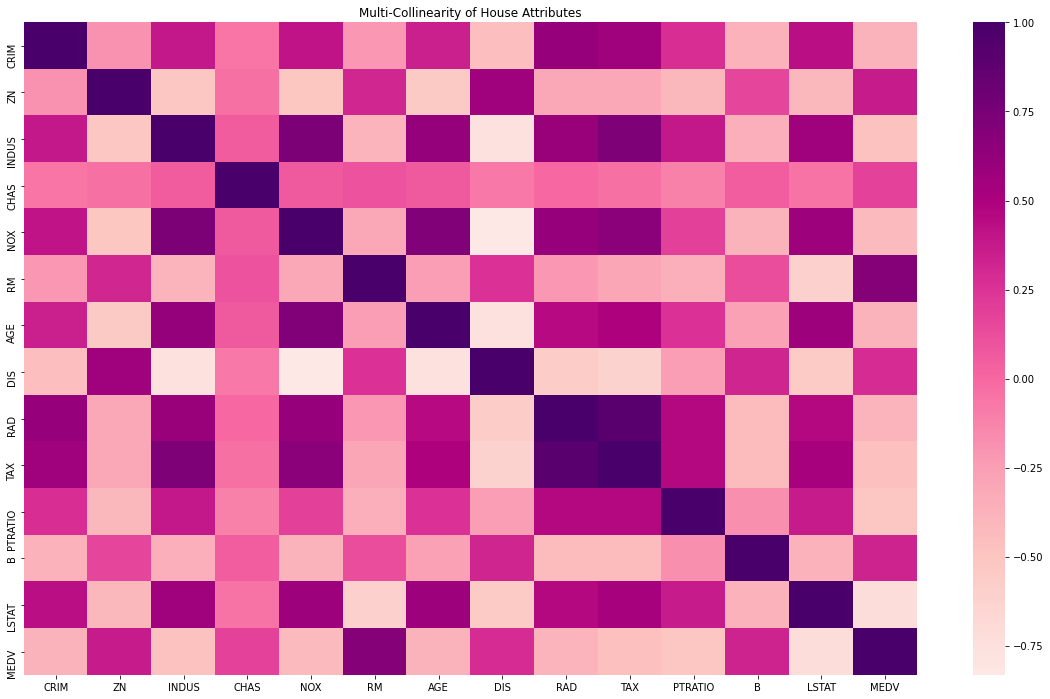

In [15]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(dataset.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of House Attributes')

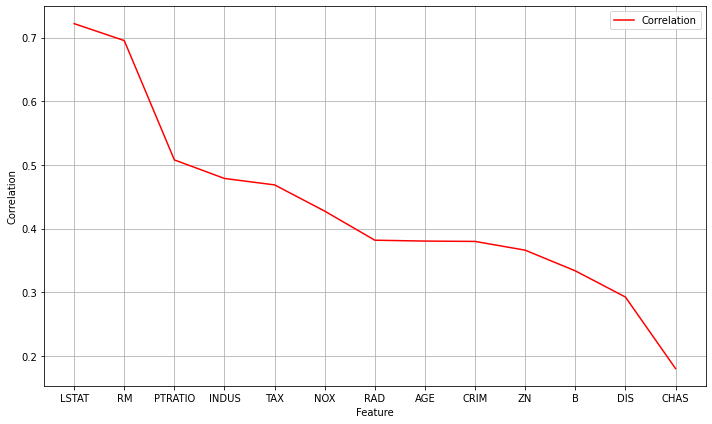

In [16]:
corr=abs(dataset.corr())
plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

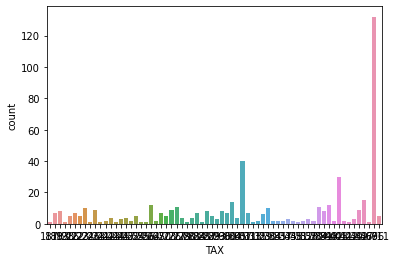

In [17]:
k='TAX'
sns.countplot(dataset[k])


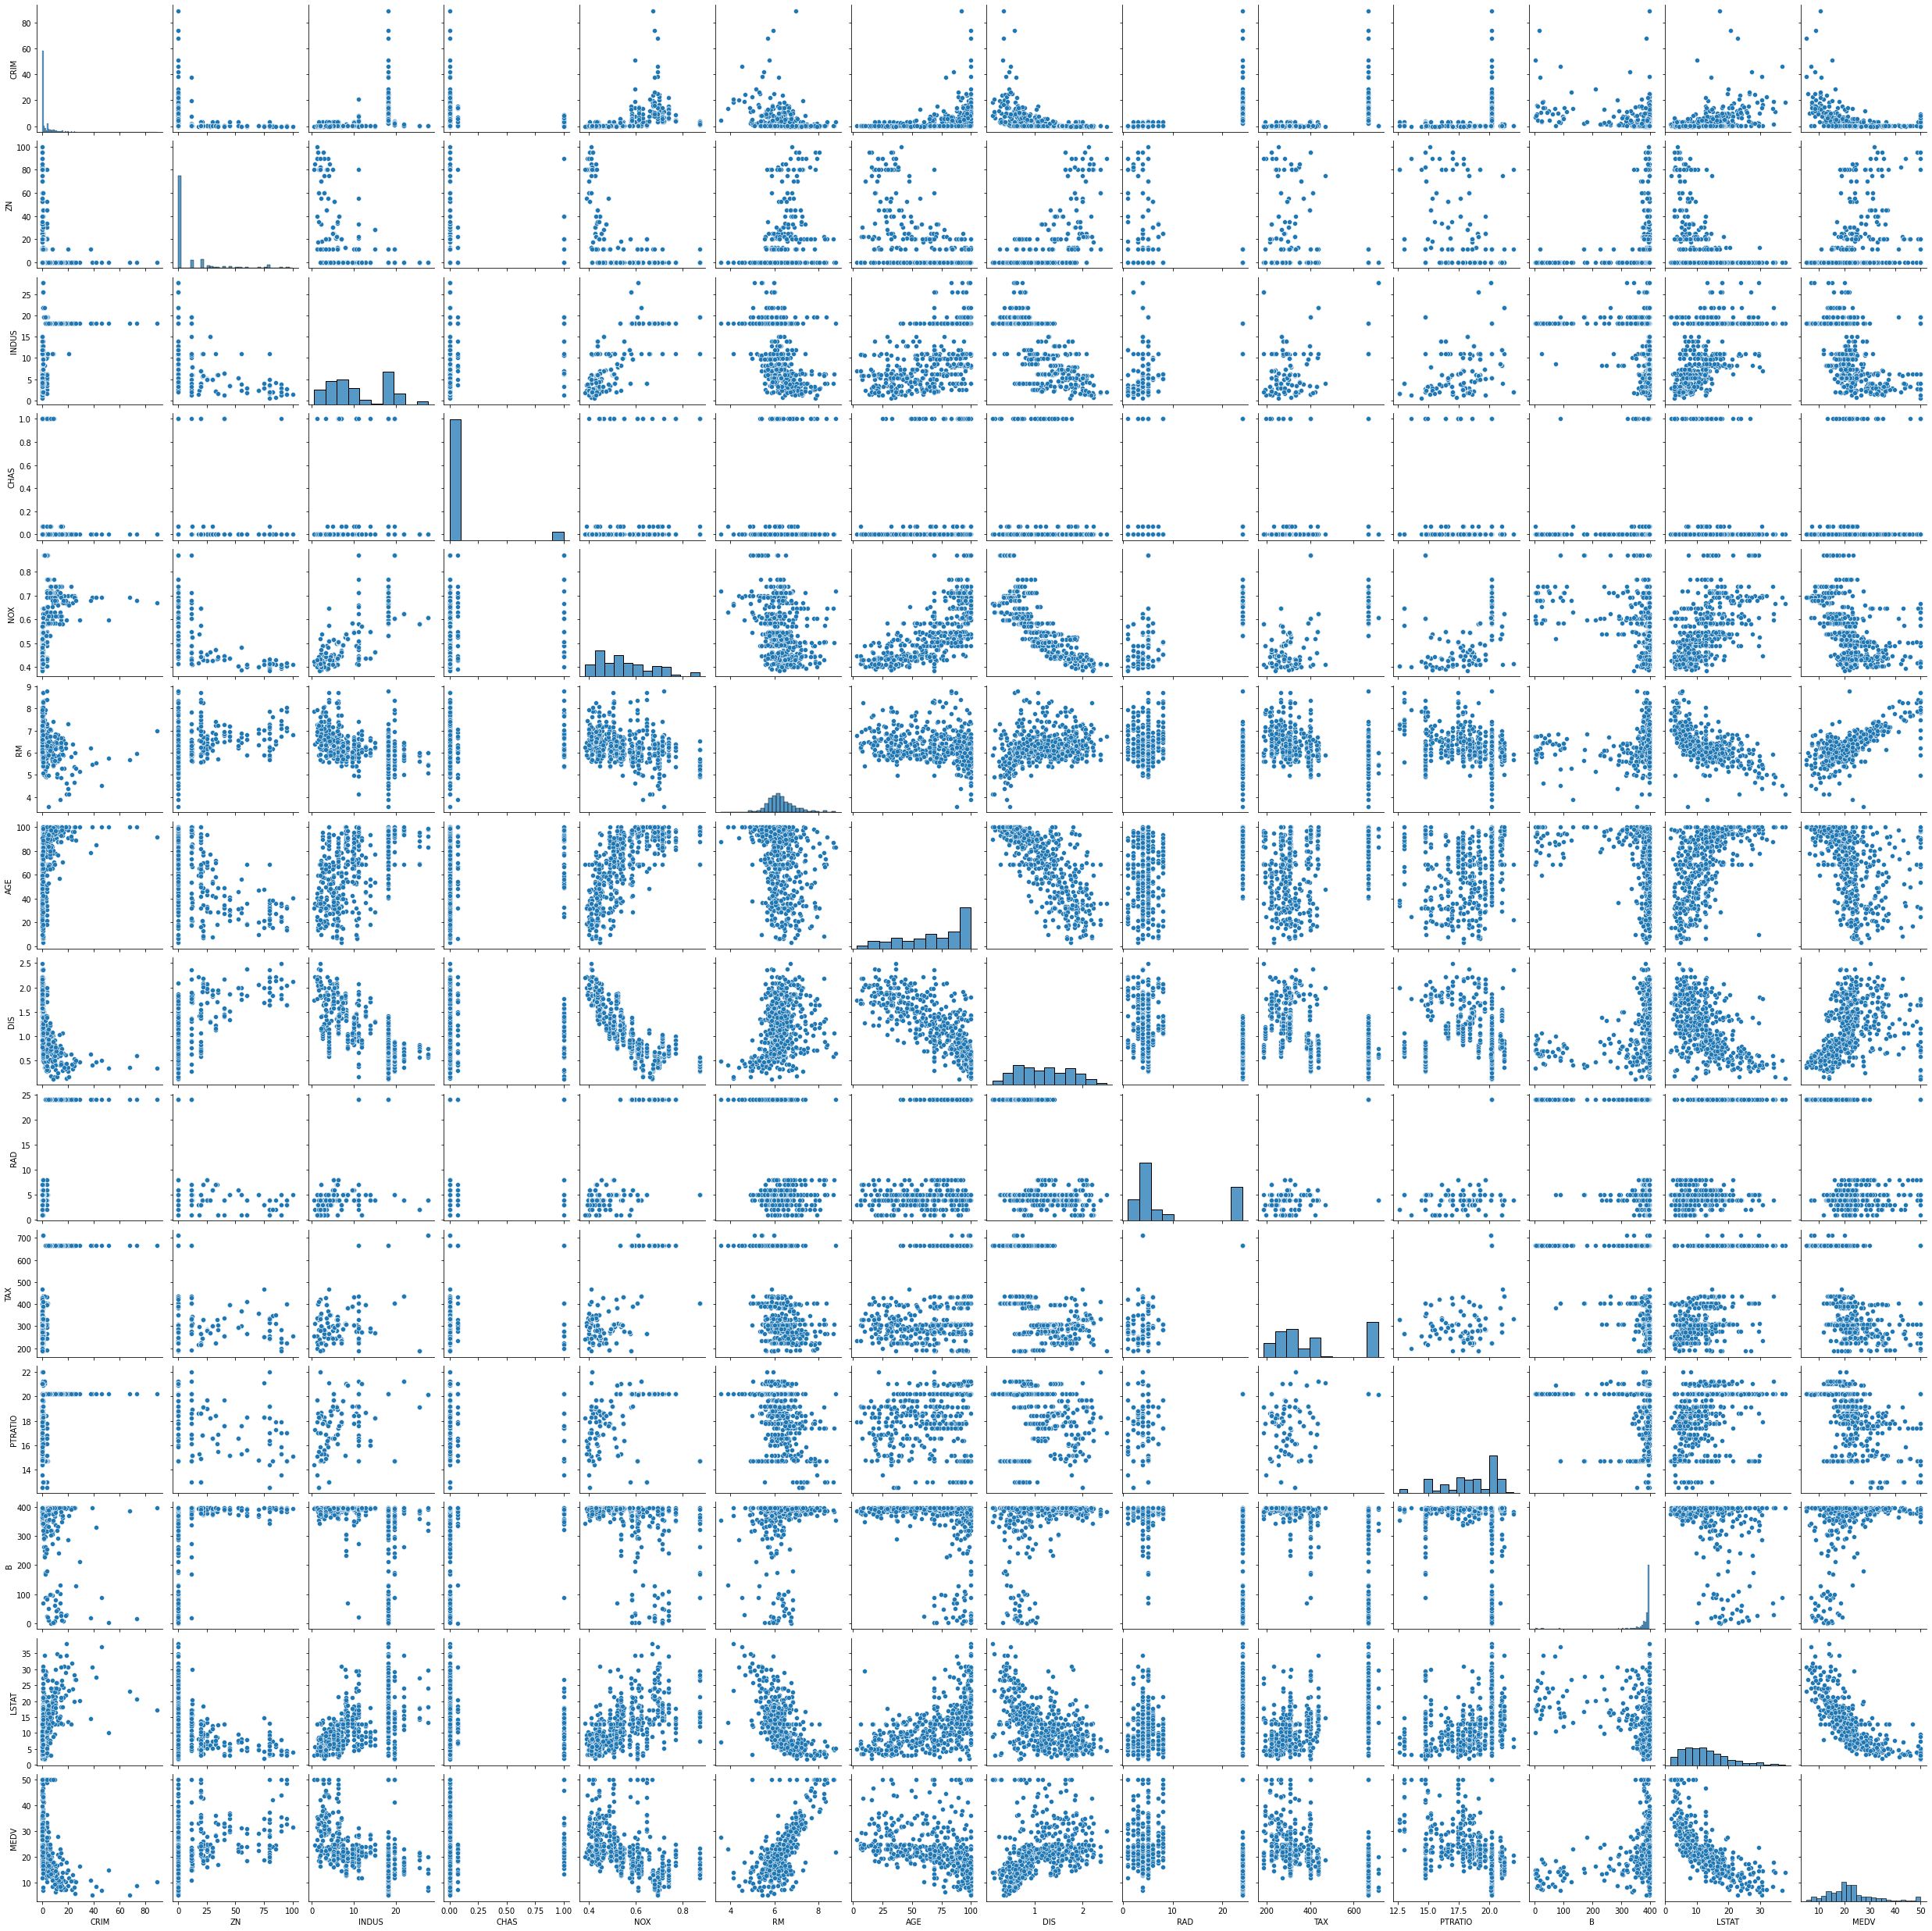

In [18]:
sns.pairplot(dataset)


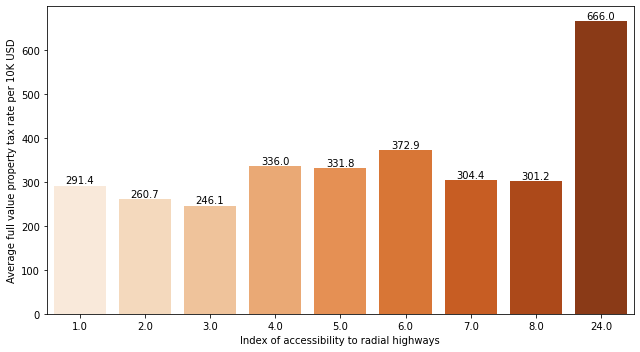

In [19]:
TARGET_COL = 'MEDV'
TARGET = dataset[TARGET_COL]
FEATURES = dataset.drop(columns=[TARGET_COL])
fig, ax = plt.subplots(figsize=(9,5))
splot = sns.barplot(data=FEATURES.groupby('RAD')[['RAD', 'TAX']].agg(np.mean), x='RAD', y= 'TAX', ax=ax , palette='Oranges')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points'
                  )
plt.ylabel('Average full value property tax rate per 10K USD')
plt.xlabel('Index of accessibility to radial highways')
plt.tight_layout()

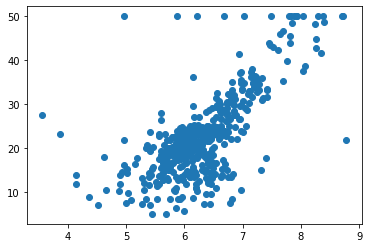

In [20]:
predictor = dataset[["RM"]]
target = dataset[["MEDV"]]
plt.scatter(predictor,target)

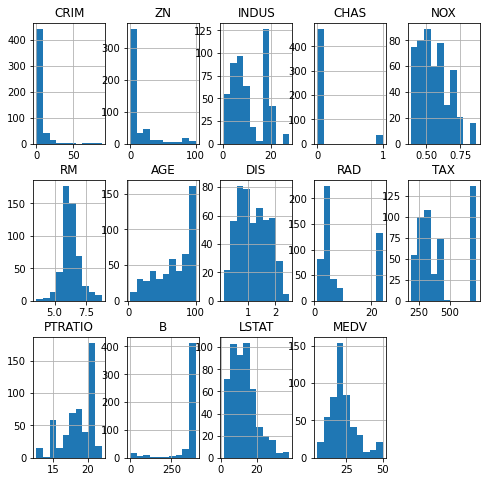

In [21]:
dataset.hist(figsize=(8,8),layout=(3,5))
plt.show()

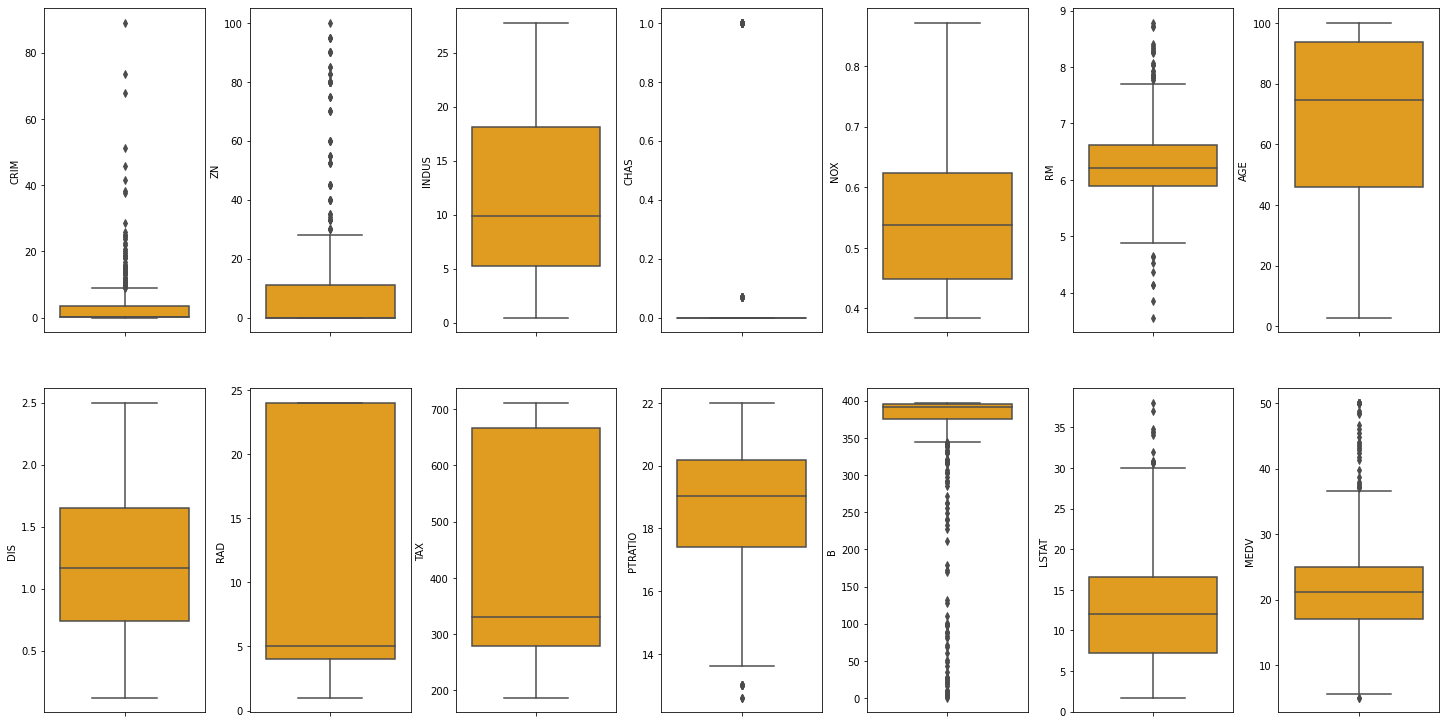

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [22]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index],color="orange")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in dataset.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

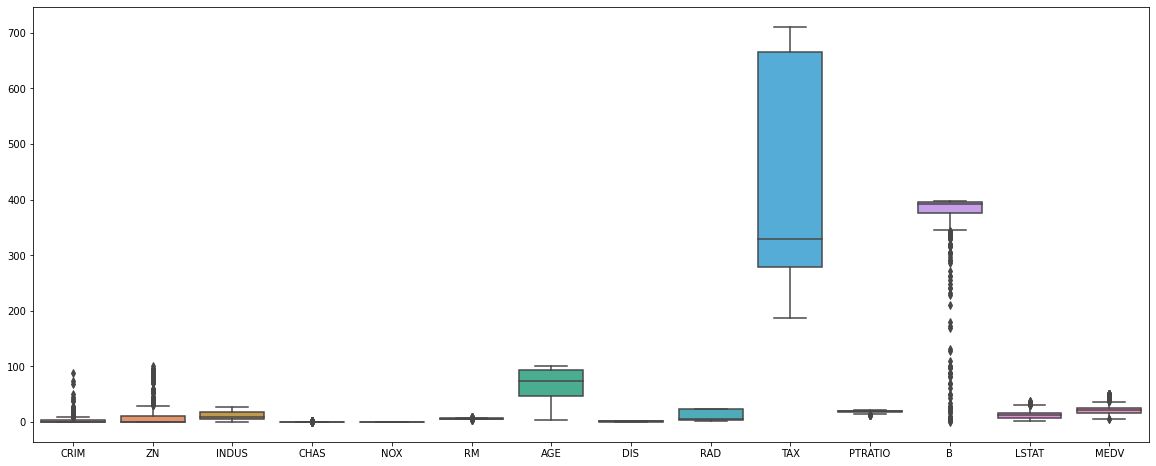

In [23]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = dataset, width = 0.8)
plt.show()

### Observations



> Houses with more rooms(higher 'RM' value) will worth more. Usually houses with more rooms bigger and can fit more people, so it is reasonable that they cost more money.



### Split dataset into training and testing dataset.

In [24]:
X = dataset.drop('MEDV',axis=1)
y = dataset['MEDV']
print(dataset.shape)
print(X.shape)
print(y.shape)

(506, 14)
(506, 13)
(506,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404,)
y_test:  (102,)


In [26]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Linear Regression

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print("Intercept: ", regressor.intercept_)

Intercept:  44.675684995259246


In [29]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.148619
ZN,0.046555
INDUS,-0.109072
CHAS,3.585018
NOX,-21.961839
RM,3.761617
AGE,-0.035690
DIS,-8.855204
RAD,0.314428
TAX,-0.015403


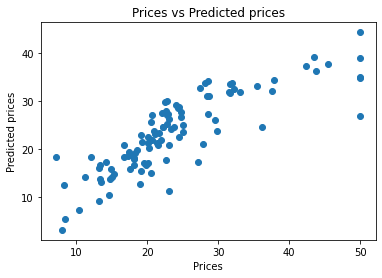

In [30]:
pred_linreg = regressor.predict(X_test)
plt.scatter(y_test,pred_linreg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

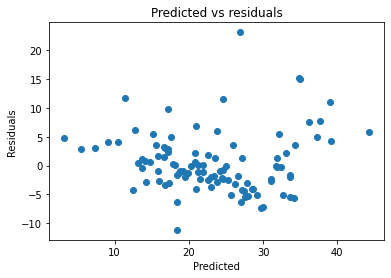

In [31]:
plt.scatter(pred_linreg,y_test-pred_linreg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0.5, 1.0, 'Distribution of the predicted values')

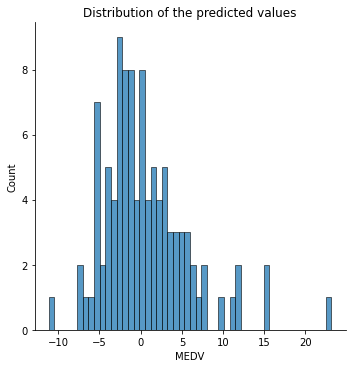

In [32]:
sns.displot((y_test-pred_linreg),bins=50)
plt.title("Distribution of the predicted values")

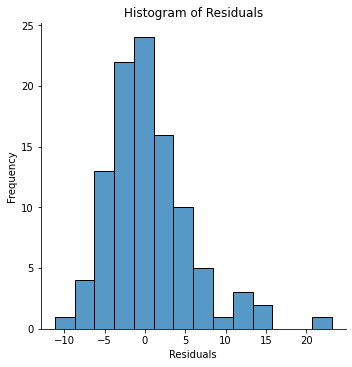

In [33]:
sns.displot(y_test-pred_linreg)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_linreg)))
print('R^2:',metrics.r2_score(y_test, pred_linreg))

Mean Absolute Error: 3.8023163176584633
Mean Squared Error: 27.724004818553762
Root Mean Squared Error: 5.265358944891958
R^2: 0.7032448127177964


In [35]:
x = regressor.score(X_test, y_test)
print(x)

0.7032448127177964


In [36]:
regressor.score(X_train, y_train)

0.7598104753392023

In [37]:
regressorscore= x*100
print("Regressor Score: ",regressorscore)

Regressor Score:  70.32448127177963


In [38]:
import random
n = random.randint(0,100)
print("Sample number: ", n)

Sample number:  16


In [39]:
sse = np.square(y_test.iloc[n] - pred_linreg[n])
print("The mean squared error is: ", sse)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

The mean squared error is:  5.141490705701151
Actual value is:  35.4
Predicted value is:  33.13251445303368


In [40]:
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

(506, 13) (506,)


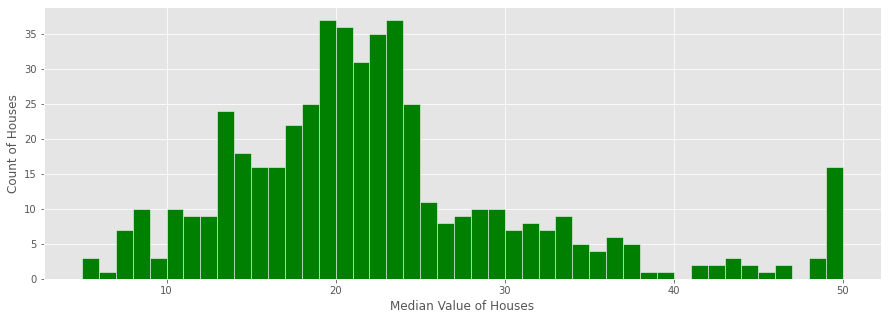

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plot = plt.hist(dataset.MEDV, bins=45, color='g', edgecolor = 'white')
plt.xlabel('Median Value of Houses')
plt.ylabel('Count of Houses')
plt.show()

### KNN Regression

In [42]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [43]:
def knn_reg(tr , tr_lab, te , te_lab , k):
    preds = []
    for i in range(te.shape[0]):
        value = knn_r(tr, tr_lab, te[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(te_lab , preds)
    return err
acc = knn_reg(xtrain , ytrain , xtest , ytest ,5)
print ("MEAN SQUARED ERROR:",acc)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

MEAN SQUARED ERROR: 25.860125490196076
Actual value is:  35.4
Predicted value is:  33.13251445303368


### Evaluation Matrics

In [44]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(xtrain.astype('int'), ytrain.astype('int'))
confusion_matrix(ytest.astype('int'), m.predict(xtest).astype('int'))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [45]:
m.score(xtest.astype('int'), ytest.astype('int'))

0.16666666666666666

In [46]:
accuracy_score(ytest.astype('int'), m.predict(xtest).astype('int'))

0.10784313725490197